In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
goal_dist = 2.0
hypotenuse = 6.4 * 2**0.5
max_improv_per_step = 0.01  # 1 m/s for 0.01s
realistic_coef = 0.5
realistic_improv = max_improv_per_step * realistic_coef

In [4]:
realistic_iters = goal_dist / (max_improv_per_step * realistic_coef)
realistic_iters = int(realistic_iters)
realistic_iters

400

## Difference of (scaled) normalized euclidean potentials


(np.float64(0.0901000000000023),
 np.float64(0.12989999999999724),
 np.float64(0.11000000000000004),
 np.float64(0.011518101695447333))

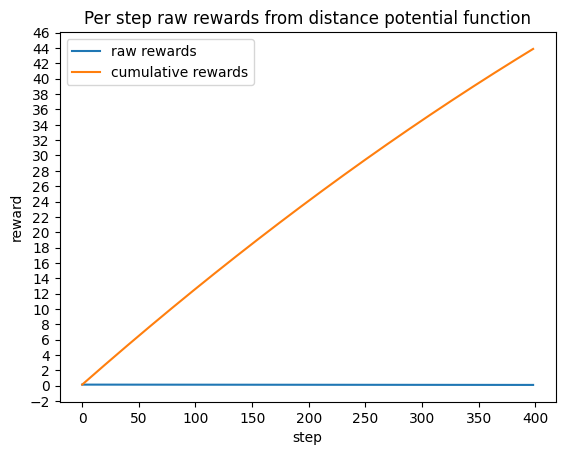

In [12]:
gamma = 0.999
coef = 20.
step_penalty = -0.01
rewards_potential = np.zeros(realistic_iters-1)
for i in range(1, realistic_iters):
    dist_prev = (goal_dist - (i - 1) * realistic_improv)
    dist_curr = (goal_dist - i * realistic_improv)
    delta_phi = dist_prev - gamma * dist_curr # positive if the distance is decreasing
    rewards_potential[i-1] = delta_phi * coef + step_penalty

plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential, label="raw rewards")
plt.xlabel("step")
plt.ylabel("reward")
plt.locator_params(axis="y", nbins=30)
plt.plot(np.cumsum(rewards_potential), label="cumulative rewards")
plt.legend()

np.min(rewards_potential), np.max(rewards_potential), np.mean(rewards_potential), np.std(rewards_potential)